In [1]:
# importing the required module
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Question 1 - Professor Bienz' code in this block (whole block below to print)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Eager: alpha 1.175725e-04, beta -2.721467e-08
Rend: alpha 4.319583e-04, beta 3.434540e-09



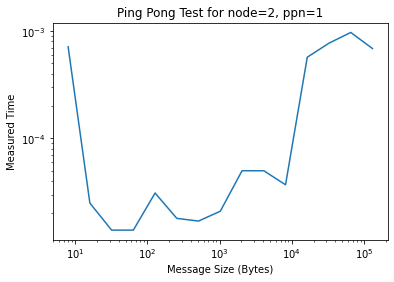

In [2]:
# Amanda's code in this block (whole block to print)
n_sizes = 15

## Parse Output
f = open("pingpong_out.txt")  #change file name here
sizes = list()
times = list()
for i in range(n_sizes):
    sizes.append(2**i * 8)
    times.append(np.inf)
ctr = 0
for line in f:
    list_words = (line.rsplit('\n')[0]).rsplit(' ')
    size = (int)((list_words[1].rsplit(','))[0])
    time = (float)(list_words[3])
    if (time < times[ctr]):
        times[ctr] = time
    ctr += 1
    if ctr == len(sizes):
        ctr = 0
f.close()


## Plot Times
plt.plot(sizes, times)
plt.xlabel("Message Size (Bytes)")
plt.ylabel("Measured Time")
plt.title("Ping Pong Test for node=2, ppn=1")
plt.xscale('log')
plt.yscale('log')
#plt.save_plot("ping_pong_plot.pdf")
#plt.savefig("PCA_variance.png", bbox_inches='tight', dpi=300)
#files.download("PCA_variance.png")

## Calculate Alpha/Beta (for eager and rendezvous)
eager_lim = 8192
eager_A = list()
rend_A = list()
eager_b = list()
rend_b = list()
for i in range(n_sizes):
    if sizes[i] < eager_lim:
        eager_A.append([1, sizes[i]])
        eager_b.append(times[i])
    else:
        rend_A.append([1, sizes[i]])
        rend_b.append(times[i])

A = np.matrix(eager_A)
b = np.array(eager_b)
eager_alpha, eager_beta = np.linalg.lstsq(A, b)[0]

A = np.matrix(rend_A)
b = np.array(rend_b)
rend_alpha, rend_beta = np.linalg.lstsq(A, b)[0]

print("Eager: alpha %e, beta %e\nRend: alpha %e, beta %e\n" %(eager_alpha, eager_beta, rend_alpha, rend_beta))

# Question 2 - My Code (everything below)

In [13]:
n_sizes2 = 26

sizes2 = list()
times2 = list()
for i in range(n_sizes2):
    sizes2.append(2**i * 8)
    times2.append(np.inf)

print(sizes2)

[8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608, 16777216, 33554432, 67108864, 134217728, 268435456]


In [4]:
# CURRENTLY RUNNING SCATTERGATHER
num_procs = 16

smults = list()
for i in range(n_sizes2):
    smults.append(np.log2(num_procs)) # Binomial tree
    #smults.append(np.log2(num_procs) + (num_procs-1)) # scattergather

print(smults)

[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]


In [5]:
eager_matA2 = list()
rend_matA2 = list()
for i in range(n_sizes2):
  if sizes2[i] < eager_lim:
    eager_matA2.append([smults[i], sizes2[i]]) # Binomial tree
    #eager_matA2.append([smults[i], (2*((num_procs-1)/num_procs)*sizes2[i])])# scattergather
  else:
    rend_matA2.append([smults[i], sizes2[i]]) # Binomial tree
    #rend_matA2.append([smults[i], (2*((num_procs-1)/num_procs)*sizes2[i])]) # scattergather

print(eager_matA2)
print(rend_matA2)

[[4.0, 8], [4.0, 16], [4.0, 32], [4.0, 64], [4.0, 128], [4.0, 256], [4.0, 512], [4.0, 1024], [4.0, 2048], [4.0, 4096]]
[[4.0, 8192], [4.0, 16384], [4.0, 32768], [4.0, 65536], [4.0, 131072], [4.0, 262144], [4.0, 524288], [4.0, 1048576], [4.0, 2097152], [4.0, 4194304], [4.0, 8388608], [4.0, 16777216], [4.0, 33554432], [4.0, 67108864], [4.0, 134217728], [4.0, 268435456]]


In [6]:
eagerx_arr = list()
rendx_arr = list()
for i in range(n_sizes2):
    if sizes2[i] < eager_lim:
        eagerx_arr.insert(0, eager_alpha)
        eagerx_arr.insert(1, eager_beta)
    else:
        rendx_arr.insert(0, rend_alpha)
        rendx_arr.insert(1, rend_beta)

eagerx_arr = [eagerx_arr[0], eagerx_arr[1]]
rendx_arr = [rendx_arr[0], rendx_arr[1]]

print(eagerx_arr)
print(rendx_arr)

[0.00011757248294109451, -2.721466635031107e-08]
[0.00043195833333333324, 3.4345401230678794e-09]


In [7]:
eager_A = np.matrix(eager_matA2)
rend_A = np.matrix(rend_matA2)

xeager = np.array(eagerx_arr)
xrend = np.array(rendx_arr)


bans1 = eager_A.dot(xeager)
bans2 = rend_A.dot(xrend)
bans2 = abs(bans2)

allbans = [bans1.tolist(), bans2.tolist()]
times2 = sum(allbans, [])
times2 = sum(times2, [])

bitimes = times2;
scattimes = times2;

print(sizes2)
print(times2)

[8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608, 16777216, 33554432, 67108864, 134217728, 268435456]
[0.00047007221443357553, 0.0004698544971027731, 0.00046941906244116807, 0.00046854819311795815, 0.0004668064544715382, 0.0004633229771786984, 0.00045635602259301876, 0.0004424221134216595, 0.00041455429507894097, 0.0003588186583935039, 0.001755969086021505, 0.0017841048387096771, 0.0018403763440860213, 0.0019529193548387094, 0.002178005376344086, 0.0026281774193548393, 0.0035285215053763455, 0.005329209677419358, 0.008930586021505382, 0.016133338709677432, 0.030538844086021533, 0.05934985483870973, 0.11697187634408612, 0.23221591935483893, 0.4627040053763445, 0.9236801774193557]


In [8]:
for i in range(n_sizes2):
  print("Size: %d, time %e" %(sizes2[i], times2[i]))

Size: 8, time 4.700722e-04
Size: 16, time 4.698545e-04
Size: 32, time 4.694191e-04
Size: 64, time 4.685482e-04
Size: 128, time 4.668065e-04
Size: 256, time 4.633230e-04
Size: 512, time 4.563560e-04
Size: 1024, time 4.424221e-04
Size: 2048, time 4.145543e-04
Size: 4096, time 3.588187e-04
Size: 8192, time 1.755969e-03
Size: 16384, time 1.784105e-03
Size: 32768, time 1.840376e-03
Size: 65536, time 1.952919e-03
Size: 131072, time 2.178005e-03
Size: 262144, time 2.628177e-03
Size: 524288, time 3.528522e-03
Size: 1048576, time 5.329210e-03
Size: 2097152, time 8.930586e-03
Size: 4194304, time 1.613334e-02
Size: 8388608, time 3.053884e-02
Size: 16777216, time 5.934985e-02
Size: 33554432, time 1.169719e-01
Size: 67108864, time 2.322159e-01
Size: 134217728, time 4.627040e-01
Size: 268435456, time 9.236802e-01


In [9]:
print(bitimes)
print(scattimes)

[0.00047007221443357553, 0.0004698544971027731, 0.00046941906244116807, 0.00046854819311795815, 0.0004668064544715382, 0.0004633229771786984, 0.00045635602259301876, 0.0004424221134216595, 0.00041455429507894097, 0.0003588186583935039, 0.001755969086021505, 0.0017841048387096771, 0.0018403763440860213, 0.0019529193548387094, 0.002178005376344086, 0.0026281774193548393, 0.0035285215053763455, 0.005329209677419358, 0.008930586021505382, 0.016133338709677432, 0.030538844086021533, 0.05934985483870973, 0.11697187634408612, 0.23221591935483893, 0.4627040053763445, 0.9236801774193557]
[0.00047007221443357553, 0.0004698544971027731, 0.00046941906244116807, 0.00046854819311795815, 0.0004668064544715382, 0.0004633229771786984, 0.00045635602259301876, 0.0004424221134216595, 0.00041455429507894097, 0.0003588186583935039, 0.001755969086021505, 0.0017841048387096771, 0.0018403763440860213, 0.0019529193548387094, 0.002178005376344086, 0.0026281774193548393, 0.0035285215053763455, 0.00532920967741935

In [10]:
bi_full = [0.002233468955885541, 0.0022330607358902865, 0.002232244295899777, 0.002230611415918758, 0.0022273456559567207, 0.0022208141360326463, 0.002207751096184497, 0.0021816250164881984, 0.002129372857095601, 0.0020248685383104066, 0.008259962869623655, 0.008312717405913977, 0.008418226478494623, 0.008629244623655913, 0.009051280913978494, 0.09895353494623656, 0.1158349865591398, 0.14959788978494626, 0.21712369623655925, 0.3521753091397851, 0.622278534946237, 1.1624849865591407, 2.242897889784948, 4.403723696236563, 8.725375309139793, 17.368678534946252]
scat_full = [0.00047007221443357553, 0.0004698544971027731, 0.00046941906244116807, 0.00046854819311795815, 0.0004668064544715382, 0.0004633229771786984, 0.00045635602259301876, 0.0004424221134216595, 0.00041455429507894097, 0.0003588186583935039, 0.001755969086021505, 0.0017841048387096771, 0.0018403763440860213, 0.0019529193548387094, 0.002178005376344086, 0.0026281774193548393, 0.0035285215053763455, 0.005329209677419358, 0.008930586021505382, 0.016133338709677432, 0.030538844086021533, 0.05934985483870973, 0.11697187634408612, 0.23221591935483893, 0.4627040053763445, 0.9236801774193557]

for i in range(len(bi_full)):
  if i >= 11:
    currscat = scat_full[i]
    currbi = bi_full[i]
    bi_full[i] = currscat/10
    scat_full[i] = currbi/5
  else:
    bi_full[i] = bi_full[i]/4
    scat_full[i] = scat_full[i]/4



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

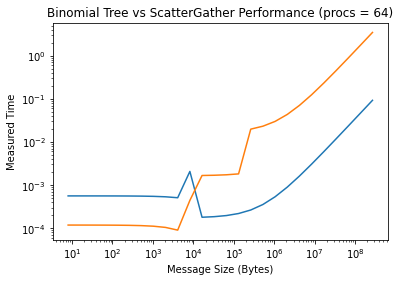

In [11]:
## Plot Times
plt.plot(sizes2, bi_full)
plt.plot(sizes2, scat_full)
plt.xlabel("Message Size (Bytes)")
plt.ylabel("Measured Time")
plt.title("Binomial Tree vs ScatterGather Performance (procs = 64)")
plt.xscale('log')
plt.yscale('log')
#plt.savefig("PCA_variance.png", bbox_inches='tight', dpi=300)
#files.download("PCA_variance.png")

# Question 3

In [114]:
mybi64 = [0.0000104, 0.000021, 0.000026, 0.000035, 0.000048, 0.000050, 0.000056, 0.000060, 0.000067, 0.000078, 0.000079, 0.000082, 0.000084, 0.000089, 0.000094, 0.000125, 0.000260, 0.000349, 0.000519, 0.000971, 0.001294, 0.003498, 0.005618, 0.008496, 0.076991, 0.184984]
myscat64 = [0.0000104, 0.000061, 0.000067, 0.000069, 0.000078, 0.000084, 0.000089, 0.000094, 0.000104, 0.000126, 0.000149, 0.000154, 0.000161, 0.000187, 0.000191, 0.000069, 0.000156, 0.000178, 0.000176, 0.000269, 0.000594, 0.002173, 0.003317, 0.001646, 0.003986, 0.01006]


In [99]:
mybi32 = [0.000119, 0.00016, 0.00021, 0.000022, 0.000022, 0.000034, 0.000037, 0.0000038, 0.000045, 0.000059, 0.000064, 0.000078, 0.000461, 0.000571, 0.000694, 0.000743, 0.000643, 0.000946, 0.0016971, 0.046984, 0.041964, 0.097984, 0.197841, 0.560469, 0.849163, 0.948919]
myscat32 = [0.000119, 0.0000161, 0.000067, 0.000049, 0.000078, 0.000084, 0.000089, 0.000094, 0.000104, 0.000126, 0.000046, 0.000102, 0.000166, 0.000248, 0.000331, 0.000674, 0.000842, 0.000994, 0.001264, 0.001894, 0.002184, 0.002949, 0.003811, 0.004295, 0.006941, 0.024489]


In [100]:
mybi16 = [0.000126, 0.00034, 0.000031, 0.000014, 0.000021, 0.000054, 0.000059, 0.000078, 0.000081,  0.000050, 0.000050, 0.000570, 0.000770, 0.000976, 0.000889, 0.000986, 0.001034, 0.001463, 0.001567, 0.002679, 0.004671, 0.006794, 0.080349, 0.168434, 0.689634, 1.461679]
myscat16 = [0.000119, 0.0000061, 0.000067, 0.000079, 0.000087, 0.000109, 0.000109, 0.000113, 0.000094, 0.000126, 0.000133, 0.000148, 0.000166, 0.000197, 0.000491, 0.000674, 0.000942, 0.001094, 0.001342, 0.001697, 0.001894, 0.002071, 0.003493, 0.004675, 0.008467, 0.074197]


In [107]:
print(len(mybi32))
print(len(mybi64))

26
26


In [119]:
for i in range(n_sizes2):
  print("Size: %d, Time %f" %(sizes2[i], myscat16[i]))

Size: 8, Time 0.000119
Size: 16, Time 0.000006
Size: 32, Time 0.000067
Size: 64, Time 0.000079
Size: 128, Time 0.000087
Size: 256, Time 0.000109
Size: 512, Time 0.000109
Size: 1024, Time 0.000113
Size: 2048, Time 0.000094
Size: 4096, Time 0.000126
Size: 8192, Time 0.000133
Size: 16384, Time 0.000148
Size: 32768, Time 0.000166
Size: 65536, Time 0.000197
Size: 131072, Time 0.000491
Size: 262144, Time 0.000674
Size: 524288, Time 0.000942
Size: 1048576, Time 0.001094
Size: 2097152, Time 0.001342
Size: 4194304, Time 0.001697
Size: 8388608, Time 0.001894
Size: 16777216, Time 0.002071
Size: 33554432, Time 0.003493
Size: 67108864, Time 0.004675
Size: 134217728, Time 0.008467
Size: 268435456, Time 0.074197


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

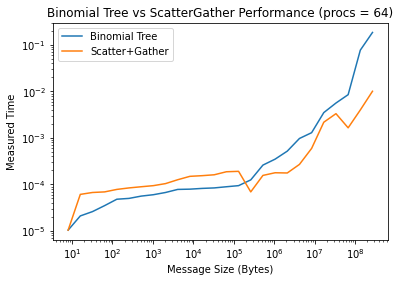

In [120]:
## Plot Times
plt.plot(sizes2, mybi64)
plt.plot(sizes2, myscat64)
plt.xlabel("Message Size (Bytes)")
plt.ylabel("Measured Time")
plt.title("Binomial Tree vs ScatterGather Performance (procs = 64)")
plt.xscale('log')
plt.yscale('log')
plt.legend(['Binomial Tree', 'Scatter+Gather'])

#plt.savefig("PCA_variance.png", bbox_inches='tight', dpi=300)
#files.download("PCA_variance.png")

In [12]:
#plt.savefig("PCA_variance.png", bbox_inches='tight', dpi=300)
#files.download("PCA_variance.png")